# Pytotrch 정리

## 파이토치
- 페이스북이 초기 루아 언어로 개발된 토치를 파이썬 버전으로 개발하여 2917년도에 공개하였다.
- 초기에 토치는 넘파이 라이브러리처럼 과학 연산을 위한 라이브러리로 공개되었다.
- 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시켰다.
- 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공한다.

## 파이토치 모듈 구조
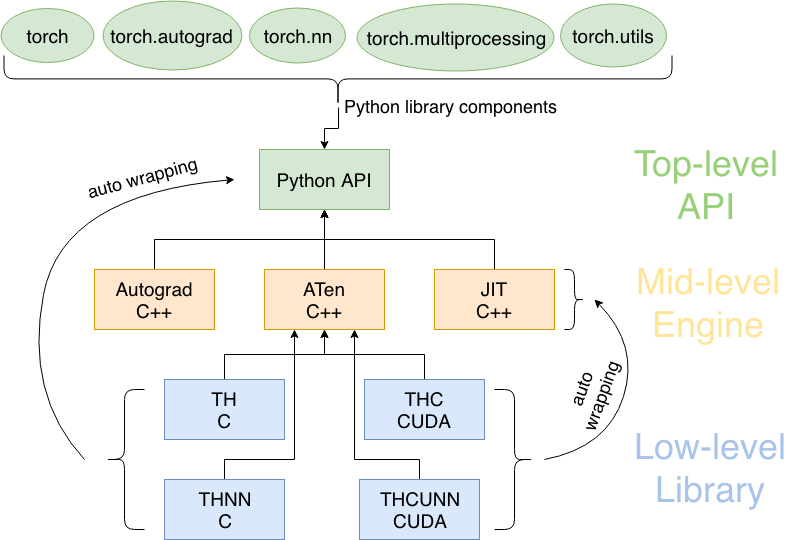

## 파이토치의 구성 요소
- torch : 매안 네임스페이스, 텐서 등의 다양한 수학 함수가 포함되어있다.
- torch.autograd : 자동 미분 기능을 제공하는 라이브러리이다.
- torch.nn : 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- touch.multiproce3ssing : 병렬처리 기능을 제공하는 라이브러리
- torch.optim : SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- torch.utils : 데이터 조작 등 유틸리티 기능 제공
- torch.onnx : ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용한다.

## 텐서 (Tensors)
- 데이터 표현을 위한 기본 구조로 텐서를 사용한다.
- 텐서는 데이터를 담기 위한 컨테이너로서 일반적으로 수치형 데이터를 저장한다.
- 넘파이의 ndarray와 유사하다.
- GPU를 사용한 연산 가속이 가능하다.

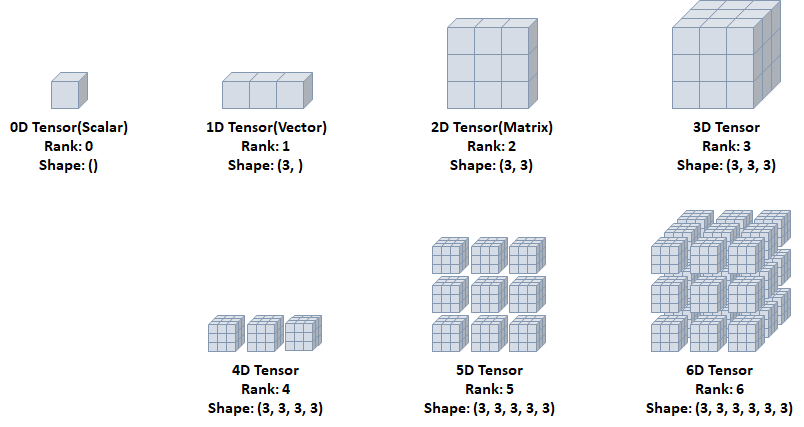



In [1]:
import torch
torch.__version__

'2.6.0+cu124'

## 텐서 초기화와 데이터 타입

### 초기화 되지 않은 텐서

In [2]:
x = torch.empty(4, 2)
print(x)

tensor([[-2.5534e+04,  4.4530e-41],
        [-2.5519e+04,  4.4530e-41],
        [-2.5545e+04,  4.4530e-41],
        [-2.5520e+04,  4.4530e-41]])


### 무작위로 초기화된 텐서

In [3]:
x = torch.rand(4, 2)
print(x)

tensor([[0.9256, 0.8934],
        [0.4456, 0.2622],
        [0.7113, 0.9194],
        [0.7007, 0.6722]])


### 데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [4]:
x = torch.zeros(4, 2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


### 사용자가 입력한 값으로 텐서 초기화

In [5]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


### 2 x 4 크기, double 타입, 1로 채워진 텐서

In [6]:
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


### x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [7]:
x = torch.randn_like(x, dtype=torch.float)
print(x)


tensor([[-0.0888,  1.7548, -1.0947,  0.5728],
        [-0.3341,  0.6181,  0.3022,  0.0660]])


### 텐서의 크기 계산

In [8]:
print(x.size())

torch.Size([2, 4])


## 데이터 타입 (Data Type)

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

In [9]:
ft = torch.FloatTensor([1, 2, 3])

print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [10]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [11]:
it = torch.IntTensor([1, 2, 3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [12]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


## Cuda Tensors
- .to 메소드를 사용하여 텐서를 어떠한 장치 (cpu, gpu)로도 옮길 수 있다.

In [13]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.6035])
-0.6034678220748901
torch.float32


In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

y = torch.ones_like(x, device=device)

print(y)

x = x.to(device)

print(x)

z = x + y

print(z)

print(z.to('cpu', torch.double))

cpu
tensor([1.])
tensor([-0.6035])
tensor([0.3965])
tensor([0.3965], dtype=torch.float64)


## 다차원 텐서 표현

### 0D Tensor (Scalar)
- 하나의 숫자를 담고 있는 텐서 (tensor)
- 축과 형상이 없다.

In [15]:
t0 = torch.tensor(0)

print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


### 1D Tensor (Vector)
- 값들을 저장한 리스트와 유사한 텐서
- 하나의 축이 존재한다.

In [16]:
t1 = torch.tensor([1, 2, 3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


### 2D Tensor (Matrix)
- 행렬과 같은 모양으로 두 개의 축이 존재한다.
- 일반적인 수치, 통계 데이터셋이 해당한다.
- 주로 샘플(Sample)과 특성(Features)를 가진 구조로 사용된다.

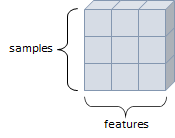

In [17]:
t2 = torch.tensor([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


### 3D Tensor
- 큐브와 같은 모양으로 세 개의 축이 존재한다.
- 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당한다.
- 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재한다.
- 주로 샘플 (Sample), 타임스탭(Timestep), 특성 (Features)을 가진 구조로 사용한다.
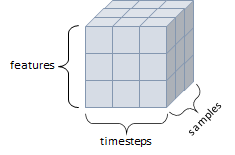

In [18]:
t3 = torch.tensor([[[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]],
                  [[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]],
                  [[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]]])

print(t3.ndim)
print(t3.shape)
print(t3)


3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


### 4D Tensor
- 4개의 축
- 컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능하다.)
- 주로 샘플, 높이, 너비, 컬러 채널을 가진 구조로 사용된다.

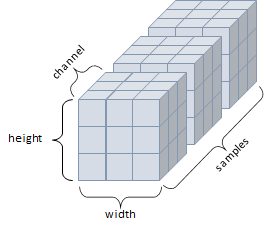

### 5D Tensor
- 5개의 축
- 비디오 데이터가 대표적인 사례이다.
- 주로 샘플, 프레임, 높이, 너비, 컬러 채널을 가진 구조로 사용된다.

## 텐서의 연산 (Operations)
- 텐서에 대한 수학 연산, 삼각 함수, 비트 연산, 비교 연산, 집계 등 제공

In [19]:
import math

a = torch.rand(1, 2) * 2 - 1
print(a)
print(torch.abs(a))

print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

tensor([[ 0.7610, -0.8310]])
tensor([[0.7610, 0.8310]])
tensor([[1., -0.]])
tensor([[ 0., -1.]])
tensor([[ 0.5000, -0.5000]])


In [20]:
print(a)
print(torch.min(a))

print(torch.max(a))

print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1, 2, 3, 1, 2, 2])))

tensor([[ 0.7610, -0.8310]])
tensor(-0.8310)
tensor(0.7610)
tensor(-0.0350)
tensor(1.1257)
tensor(-0.6324)
tensor([1, 2, 3])


- max와 min은 dim 인자를 줄 경우 argmax와 argmin도 함께 리턴한다.
  - argmax : 최대 값을 가진 인덱스
  - argmin : 최소 값을 가진 인덱스

In [21]:
x = torch.rand(2, 2)

print(x)
print(x.max(dim=0))
print(x.max(dim=1))

tensor([[0.3739, 0.5478],
        [0.0307, 0.1052]])
torch.return_types.max(
values=tensor([0.3739, 0.5478]),
indices=tensor([0, 0]))
torch.return_types.max(
values=tensor([0.5478, 0.1052]),
indices=tensor([1, 1]))


In [22]:
 print(x)
 print(x.min(dim=0))
 print(x.min(dim=1))

tensor([[0.3739, 0.5478],
        [0.0307, 0.1052]])
torch.return_types.min(
values=tensor([0.0307, 0.1052]),
indices=tensor([1, 1]))
torch.return_types.min(
values=tensor([0.3739, 0.0307]),
indices=tensor([0, 0]))


In [23]:
x = torch.rand(2, 2)
print(x)

y = torch.rand(2, 2)

print(y)

tensor([[0.5349, 0.2085],
        [0.6172, 0.2415]])
tensor([[0.0455, 0.6140],
        [0.3072, 0.8180]])


- torch.add : 덧셈

In [24]:
print(x + y)
print(torch.add(x, y))

tensor([[0.5804, 0.8225],
        [0.9244, 1.0595]])
tensor([[0.5804, 0.8225],
        [0.9244, 1.0595]])


### 결과 텐서를 인자로 사용

In [25]:
result = torch.empty(2, 4)
torch.add(x, y, out=result)
print(result)

tensor([[0.5804, 0.8225],
        [0.9244, 1.0595]])


<ipython-input-25-8c3c98e3bad2>:2: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /pytorch/aten/src/ATen/native/Resize.cpp:30.)
  torch.add(x, y, out=result)


- in-place 방식
  - in-place 방식으로 텐서의 값을 변경하는 연산 뒤에는 _"가 붙는다.
  - x.copy_(y), x.t_()

In [26]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[0.5349, 0.2085],
        [0.6172, 0.2415]])
tensor([[0.0455, 0.6140],
        [0.3072, 0.8180]])
tensor([[0.5804, 0.8225],
        [0.9244, 1.0595]])


- torch.sub : 뺄셈

In [27]:
print(x)
print(y)

print(x - y)

print(torch.sub(x, y))

print(x.sub(y))

tensor([[0.5349, 0.2085],
        [0.6172, 0.2415]])
tensor([[0.5804, 0.8225],
        [0.9244, 1.0595]])
tensor([[-0.0455, -0.6140],
        [-0.3072, -0.8180]])
tensor([[-0.0455, -0.6140],
        [-0.3072, -0.8180]])
tensor([[-0.0455, -0.6140],
        [-0.3072, -0.8180]])


- torch.mul : 곱셈

In [28]:
print(x)
print(y)
print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

tensor([[0.5349, 0.2085],
        [0.6172, 0.2415]])
tensor([[0.5804, 0.8225],
        [0.9244, 1.0595]])
tensor([[0.3104, 0.1715],
        [0.5706, 0.2559]])
tensor([[0.3104, 0.1715],
        [0.5706, 0.2559]])
tensor([[0.3104, 0.1715],
        [0.5706, 0.2559]])


torch.div : 나눗셈

In [29]:
print(x)
print(y)
print(x / y)
print(torch.div(x, y))
print(x.div(y))

tensor([[0.5349, 0.2085],
        [0.6172, 0.2415]])
tensor([[0.5804, 0.8225],
        [0.9244, 1.0595]])
tensor([[0.9216, 0.2535],
        [0.6677, 0.2280]])
tensor([[0.9216, 0.2535],
        [0.6677, 0.2280]])
tensor([[0.9216, 0.2535],
        [0.6677, 0.2280]])


- torch.mm : 내적 (dot product)

In [30]:
print(x)
print(y)
print(torch.matmul(x, y))
z = torch.mm(x, y)
print(z)
print(torch.svd(z))

tensor([[0.5349, 0.2085],
        [0.6172, 0.2415]])
tensor([[0.5804, 0.8225],
        [0.9244, 1.0595]])
tensor([[0.5032, 0.6608],
        [0.5815, 0.7635]])
tensor([[0.5032, 0.6608],
        [0.5815, 0.7635]])
torch.return_types.svd(
U=tensor([[-0.6544, -0.7562],
        [-0.7562,  0.6544]]),
S=tensor([1.2692e+00, 5.5319e-05]),
V=tensor([[-0.6058,  0.7956],
        [-0.7956, -0.6058]]))


## 텐서의 조작 (Manipulations)
- 인덱싱 (Indexing) : Numpy처럼 인덱싱 형태로 사용 가능

In [31]:
x = torch.Tensor([[1, 2],
                  [3, 4]])

print(x)
print(x[0, 0])
print(x[0, 1])
print(x[1, 0])
print(x[1, 1])

print(x[:0])
print(x[:, 1])

print(x[0, :])
print(x[1, :])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([], size=(0, 2))
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


- view : 텐서의 크기 (size)나 모양(shape)를 변경
  - 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지 되어야 한다.
  - -1로 설정되면 계산을 통해 해당 크기의 값을 유추

In [32]:
x = torch.rand(4, 5)
print(x)
y = x.view(20)
print(y)

z = x.view(5, -1)

print(z)

tensor([[0.0897, 0.8798, 0.9111, 0.7642, 0.4352],
        [0.1375, 0.9168, 0.5746, 0.5068, 0.0059],
        [0.4671, 0.8851, 0.6163, 0.0936, 0.5750],
        [0.6295, 0.0642, 0.1267, 0.7969, 0.0720]])
tensor([0.0897, 0.8798, 0.9111, 0.7642, 0.4352, 0.1375, 0.9168, 0.5746, 0.5068,
        0.0059, 0.4671, 0.8851, 0.6163, 0.0936, 0.5750, 0.6295, 0.0642, 0.1267,
        0.7969, 0.0720])
tensor([[0.0897, 0.8798, 0.9111, 0.7642],
        [0.4352, 0.1375, 0.9168, 0.5746],
        [0.5068, 0.0059, 0.4671, 0.8851],
        [0.6163, 0.0936, 0.5750, 0.6295],
        [0.0642, 0.1267, 0.7969, 0.0720]])


- item : 텐서에 값이 단 하나라도 존재하면, 숫자 갑을 얻을 수 있다.

In [33]:
x = torch.randn(1)

print(x)
print(x.item())
print(x.dtype)

tensor([-0.1250])
-0.12497738748788834
torch.float32


- 스칼라 값이 하나만 존재해야 item()를 사용할 수 잇다.

- squeeze : 차원을 축소(제거)

In [34]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.5466, 0.9338, 0.5942],
         [0.3936, 0.7474, 0.7481],
         [0.9083, 0.5236, 0.4272]]])
torch.Size([1, 3, 3])


In [35]:
t = tensor.squeeze()

print(t)

print(t.shape)

tensor([[0.5466, 0.9338, 0.5942],
        [0.3936, 0.7474, 0.7481],
        [0.9083, 0.5236, 0.4272]])
torch.Size([3, 3])


- unsqueeze : 차원을 증가 (생성)

In [36]:
t = torch.rand(3, 3)

print(t)
print(t.shape)

tensor([[9.4924e-01, 7.2758e-01, 5.7190e-02],
        [3.5363e-04, 1.9691e-01, 1.2465e-02],
        [7.2083e-02, 2.8488e-01, 4.2892e-01]])
torch.Size([3, 3])


In [37]:
tensor = t.unsqueeze(dim = 0)

print(tensor)
print(tensor.shape)

tensor([[[9.4924e-01, 7.2758e-01, 5.7190e-02],
         [3.5363e-04, 1.9691e-01, 1.2465e-02],
         [7.2083e-02, 2.8488e-01, 4.2892e-01]]])
torch.Size([1, 3, 3])


In [38]:
tensor = t.unsqueeze(dim = 2)

print(tensor)
print(tensor.shape)

tensor([[[9.4924e-01],
         [7.2758e-01],
         [5.7190e-02]],

        [[3.5363e-04],
         [1.9691e-01],
         [1.2465e-02]],

        [[7.2083e-02],
         [2.8488e-01],
         [4.2892e-01]]])
torch.Size([3, 3, 1])


- stack : 텐서간 결합

In [39]:
x = torch.FloatTensor([1, 4])
print(x)

y = torch.FloatTensor([2, 5])
print(y)

z = torch.FloatTensor([3, 6])

print(z)

print(torch.stack([x, y, z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


- cat : 텐서를 결합하는 메소드 (concatenate)
  - 넘파이의 stack과 유사하지만, 쌓을 dim이 존재해야 한다.
  - 해당 차원을 늘려준 후 결합한다.

In [40]:
a = torch.randn(1, 3, 3)
print(a)
b = torch.randn(1, 3, 3)
print(b)

c = torch.cat((a, b), dim=0)

print(c)
print(c.size())

tensor([[[ 0.4911,  0.2226,  0.4871],
         [ 1.8968, -0.8088, -0.1001],
         [ 1.0332, -1.1035, -1.2467]]])
tensor([[[ 0.8010,  0.5732,  1.7836],
         [ 1.1504,  0.2594, -0.7097],
         [-0.1379,  0.6589, -0.9084]]])
tensor([[[ 0.4911,  0.2226,  0.4871],
         [ 1.8968, -0.8088, -0.1001],
         [ 1.0332, -1.1035, -1.2467]],

        [[ 0.8010,  0.5732,  1.7836],
         [ 1.1504,  0.2594, -0.7097],
         [-0.1379,  0.6589, -0.9084]]])
torch.Size([2, 3, 3])


In [41]:
c = torch.cat((a, b), dim=1)

print(c)
print(c.size())

tensor([[[ 0.4911,  0.2226,  0.4871],
         [ 1.8968, -0.8088, -0.1001],
         [ 1.0332, -1.1035, -1.2467],
         [ 0.8010,  0.5732,  1.7836],
         [ 1.1504,  0.2594, -0.7097],
         [-0.1379,  0.6589, -0.9084]]])
torch.Size([1, 6, 3])


In [42]:
c = torch.cat((a, b), dim=2)

print(c)
print(c.size())

tensor([[[ 0.4911,  0.2226,  0.4871,  0.8010,  0.5732,  1.7836],
         [ 1.8968, -0.8088, -0.1001,  1.1504,  0.2594, -0.7097],
         [ 1.0332, -1.1035, -1.2467, -0.1379,  0.6589, -0.9084]]])
torch.Size([1, 3, 6])


- chuck : 텐서를 여러 개로 나눌 때 사용한다. (몇 개로 나눌 것인가?)

In [43]:
tensor = torch.rand(3, 6)
print(tensor)

t1, t2, t3 = torch.chunk(tensor, 3, dim = 1)

print(t1)
print(t2)
print(t3)

tensor([[0.9232, 0.5198, 0.7859, 0.1834, 0.4579, 0.9619],
        [0.8271, 0.5658, 0.5259, 0.0817, 0.3807, 0.2506],
        [0.2454, 0.3357, 0.6181, 0.3218, 0.4532, 0.0698]])
tensor([[0.9232, 0.5198],
        [0.8271, 0.5658],
        [0.2454, 0.3357]])
tensor([[0.7859, 0.1834],
        [0.5259, 0.0817],
        [0.6181, 0.3218]])
tensor([[0.4579, 0.9619],
        [0.3807, 0.2506],
        [0.4532, 0.0698]])


- split : chunck와 동일한 기능이지만, 조금 다르다. (텐서의 크기는 몇인가?)

In [44]:
tensor = torch.rand(3, 6)

t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)

tensor([[0.8869, 0.6854, 0.5566, 0.9252, 0.2211, 0.9946],
        [0.4619, 0.0137, 0.1933, 0.0504, 0.6020, 0.0266],
        [0.4385, 0.7384, 0.8069, 0.4688, 0.1793, 0.2823]])
tensor([[0.8869, 0.6854, 0.5566],
        [0.4619, 0.0137, 0.1933],
        [0.4385, 0.7384, 0.8069]])
tensor([[0.9252, 0.2211, 0.9946],
        [0.0504, 0.6020, 0.0266],
        [0.4688, 0.1793, 0.2823]])


- torch <-> numpy
  - Torch Tensor를 Numpy Array로 변환 가능
    - numpy()
    - from_numpy()
- Tensor가 CPU 상에 있다면, Numpy 배열은 메모리 공간을 공유하므로, 하나가 변하면 다른 하나도 변한다.

In [45]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [46]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [47]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [48]:
import numpy as np

a = np.ones(7)

b = torch.from_numpy(a)

np.add(a, 1, out = a)

print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## 자동 미분 (Autograd)
- torch.autograd 패키지는 Tensor의 모든 연산에 대해 자동 미분을 제공한다.
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻이다.
- backprop를 위해 미분 값을 자동으로 계산한다.

- requires_gred 속성을 True로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작한ㄷ.ㅏ
- 기록을 추적하는 것을 중단하게 하려면, .detach()를 호출하여 연산기록으로부터 분리한다.

In [49]:
a = torch.randn(3, 3)
a = a * 3

print(a)
print(a.requires_grad)

tensor([[ 3.3077, -1.3296,  1.3289],
        [ 0.5529, -1.2096, -6.3983],
        [ 1.2630, -1.8357, -6.4401]])
False


- requires_grad_()는 기존 텐서의 requires_grad 값을 바꿔치기(in-place)하여 변경한다.
  - grad_fn : 미분 값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

In [50]:
a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum()
print(b)

print(b.grad_fn)

True
tensor(103.6228, grad_fn=<SumBackward0>)


## 기울기 (Gradient)

In [51]:
x = torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [52]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [53]:
z = y * y
out = z.mean()

print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


- 계산이 완료된 후, backward()를 호출하면, 자동으로 역전파 계산이 가능하고, .grad 속성에 누적된다.

In [54]:
print(out)
out.backward()

tensor(36., grad_fn=<MeanBackward0>)


- grad : data가 거쳐온 layer에 대한 미분 값 저장

In [55]:
print(x)
print(x.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [56]:
x = torch.randn(3, requires_grad=True)

y = x * 2

while y.data.norm() < 1000:
  y = y * 2

print(y)

tensor([993.5905, 932.5812, 658.5121], grad_fn=<MulBackward0>)


In [57]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


- with torch.no_grad()룰 사용하여 기울기의 업데이트를 하지 않는다.
- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 with torch.no_grad()로 감싸면 기울 계산은 필요 없지만, requires_grad=True로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용하다.

In [58]:
print(x.requires_grad)

print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


- detach() : 내용물은 같지만, require_grad가 다른 새로운 Tensor를 가져올 때

In [59]:
print(x.requires_grad)

y = x.detach()

print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


## 자동 미분 흐름 예제
- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [60]:
a = torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [61]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [62]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


### b = a + 2

In [63]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


$c = b^2$

In [64]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [65]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [66]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


### a의 grad_fn이 None인 이유는 직접적으로 계산한 부분이 없었기 때문이다.

In [67]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [68]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


<ipython-input-68-7222c1aec66c>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  print(b.grad)


In [69]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


<ipython-input-69-f6ca42a4f63f>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  print(c.grad)


In [70]:
print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(36.)
None


<ipython-input-70-85e75c577388>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  print(out.grad)


### 데이터 준비
파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [71]:
from torch.utils.data import Dataset, DataLoader

토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [72]:
import torchvision.transforms as transforms
from torchvision import datasets

- DataLoader의 인자로 들어갈 transform을 미리 정의할 수 있고, Compose를 통해 리스트 안에 순서대로 전처리 진행한다.
- ToTensor()를 하는 이유는 torchvision이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환한다.


In [73]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5), std=(1.0,))])

In [74]:
trainset = datasets.MNIST(root='/content/',
                          train=True, download=True,
                          transform=mnist_transform)

testset = datasets.MNIST(root='/content/',
                         train=False, download=True,
                         transform=mnist_transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 53.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 916kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 7.04MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.00MB/s]


- DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때, batch_size만큼  데이터를 가져온다.

In [75]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

In [76]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [77]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

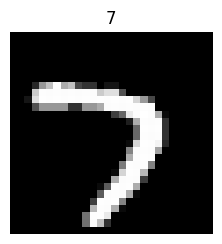

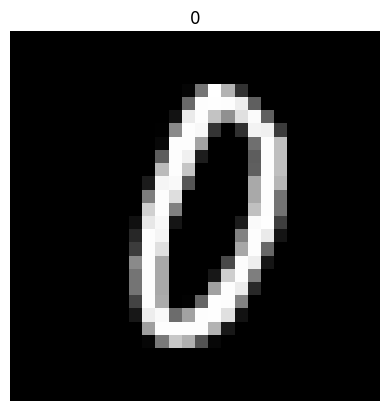

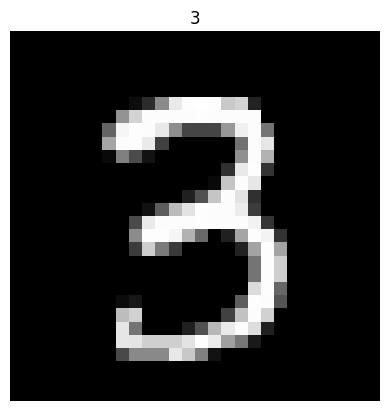

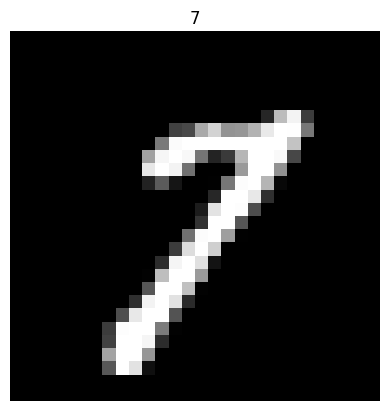

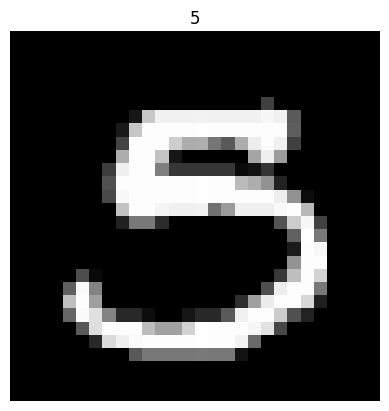

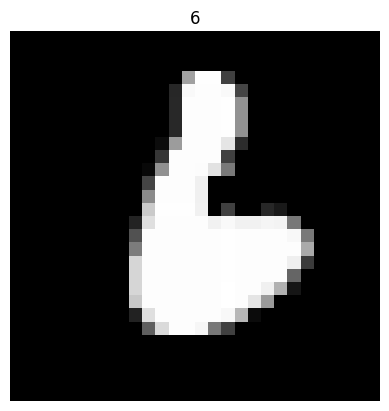

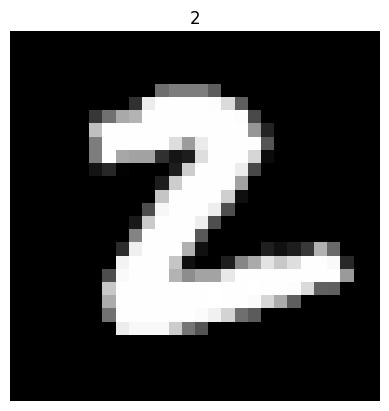

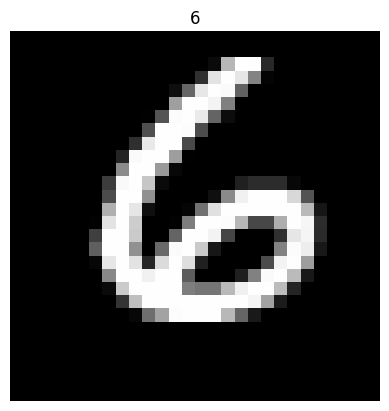

In [78]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 6))

cols, rows = 4, 2

for i in range(1, cols * rows + 1):

  sample_idx = torch.randint(len(trainset), size=(1, )).item()
  img, label = trainset[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')

  plt.show()

## 신경망 구성
- 레이어 : 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력 받아 하나 이상의 텐서를 출력한다.
- 모듈 : 한 개 이상의 계층이 모여서 구성된다.
모델 : 한 개 이상의 모듈이 모여서 구성된다.

### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


In [79]:
import torch.nn as nn

- nn.Linear 계층 예제

In [80]:
input = torch.randn(128, 20)
print(input)

m = nn.Linear(20, 30)

print(m)

output = m(input)

print(output)
print(output.size())

tensor([[-0.2661, -2.1267, -0.3028,  ...,  0.4285,  0.1643,  0.7234],
        [ 0.3843, -1.9955, -0.1662,  ..., -0.5747, -1.3760,  0.0087],
        [ 0.6862,  1.2792,  1.0012,  ..., -0.6981,  0.3187, -0.4684],
        ...,
        [-0.0626, -0.5373,  1.0799,  ..., -1.2124,  0.5372, -0.7368],
        [-0.4002, -1.6480,  1.3950,  ..., -1.0295, -0.4525, -1.5157],
        [ 1.3390,  1.4048, -0.0236,  ...,  1.8424,  0.4223,  0.3364]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[ 0.3410, -0.5081, -0.2962,  ..., -0.0717, -0.0999,  1.0017],
        [ 0.6317, -1.0077, -0.4087,  ..., -0.1064, -0.6799, -0.0073],
        [ 0.0430,  0.5655,  0.1481,  ..., -0.5789, -0.2131, -0.5289],
        ...,
        [ 0.3613,  0.2912, -0.4487,  ...,  0.6863,  0.6761,  0.7388],
        [ 0.2067, -0.2463,  0.4654,  ...,  0.5301, -0.3122,  0.2569],
        [-0.1175, -0.4168,  0.3141,  ...,  0.0299,  0.3536, -1.1833]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


- nn.Conv2d 계층 예시

In [81]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [82]:
m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))

print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [83]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


## 컨볼루션 레이어
- nn.Conv2d 예제
  - in_channels : channel의 갯수
  - out_channels : 출력 채널의 갯수
  - kernel_size : 커널(필터) 사이즈

In [84]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [85]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- Weight 확인


In [86]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- weight는 detach()를 통해 꺼내줘야 numpy() 변환이 가능하다.

In [87]:
weight = weight.detach()

In [88]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

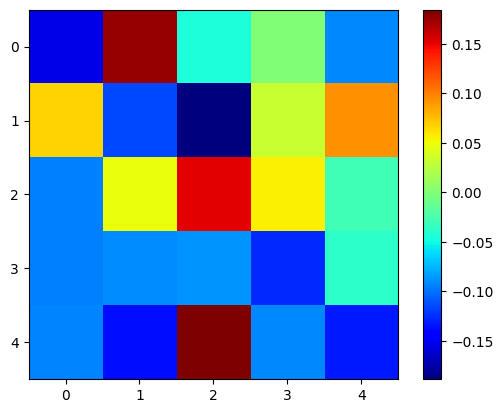

In [89]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [90]:
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [91]:
input_data = torch.unsqueeze(images[0], dim = 0)
print(input_image.size())

output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape


torch.Size([28, 28])


(1, 20, 24, 24)

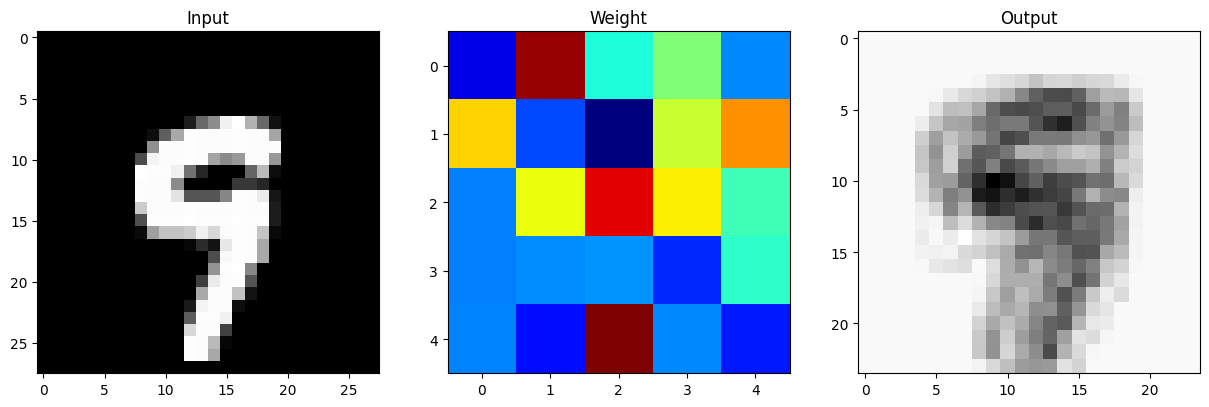

In [92]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title('Input')
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0, 0, :, :], 'jet')

plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0, 0, :, :], 'gray')

plt.show()

## 폴링 레이어 (Pooling Layer)
- F.max_pool2d
  - stride
  - kernel_size
- torch.nn.MaxPool2d도 많이 사용한다.

In [93]:
import torch.nn.functional as F

pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 Weight가 없기 때문에 바로 numpy() 변환이 가능하다.

In [94]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

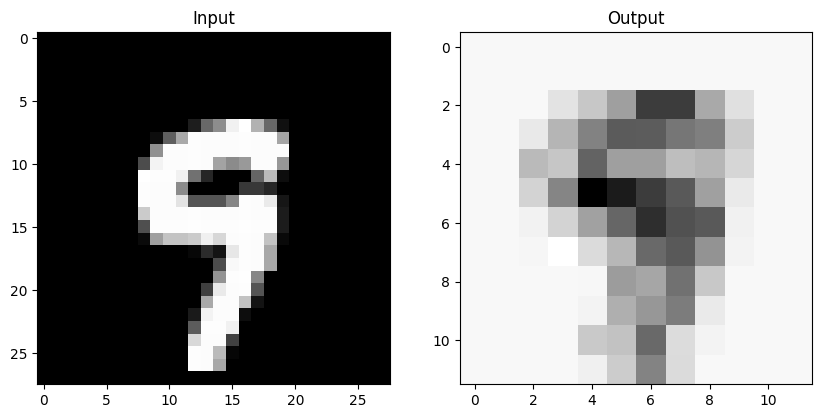

In [95]:
plt.figure(figsize=(10, 15))

plt.subplot(121)
plt.title('Input')
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0, 0, :, :], 'gray')

plt.show()

## 선형 레이어
- 1d만 가능하므로 .view()를 통해 1d로 펼쳐줘야한다.

In [96]:
flatten = input_image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [97]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [98]:
lin

tensor([[ 0.0293, -0.0445,  0.1535,  0.2285,  0.6416, -0.2706,  0.2617,  0.6228,
         -0.4548,  0.0103]], grad_fn=<AddmmBackward0>)

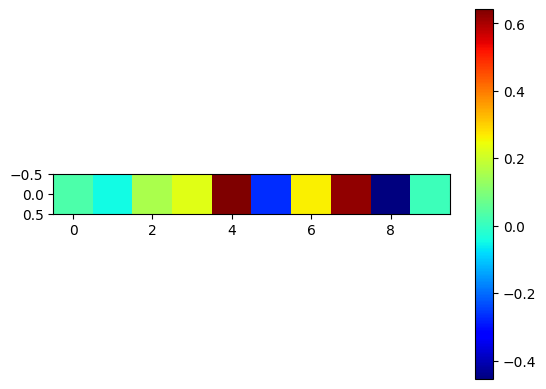

In [99]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

## 비선형 활성화
- F.softmax와 같은 활성화 함수 등

In [100]:
with torch.no_grad():
  flatten = input_image.view(1, 28 * 28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin, dim=1)

softmax

tensor([[0.0781, 0.0892, 0.0831, 0.1185, 0.1898, 0.0766, 0.1253, 0.0845, 0.0712,
         0.0837]])

In [101]:
np.sum(softmax.numpy())

np.float32(1.0)

- F.relu
  - ReLu 함수를 적용하는 레이어
  - nn.ReLU로도 사용이 가능하다.

In [102]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [103]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## 신경망 종류
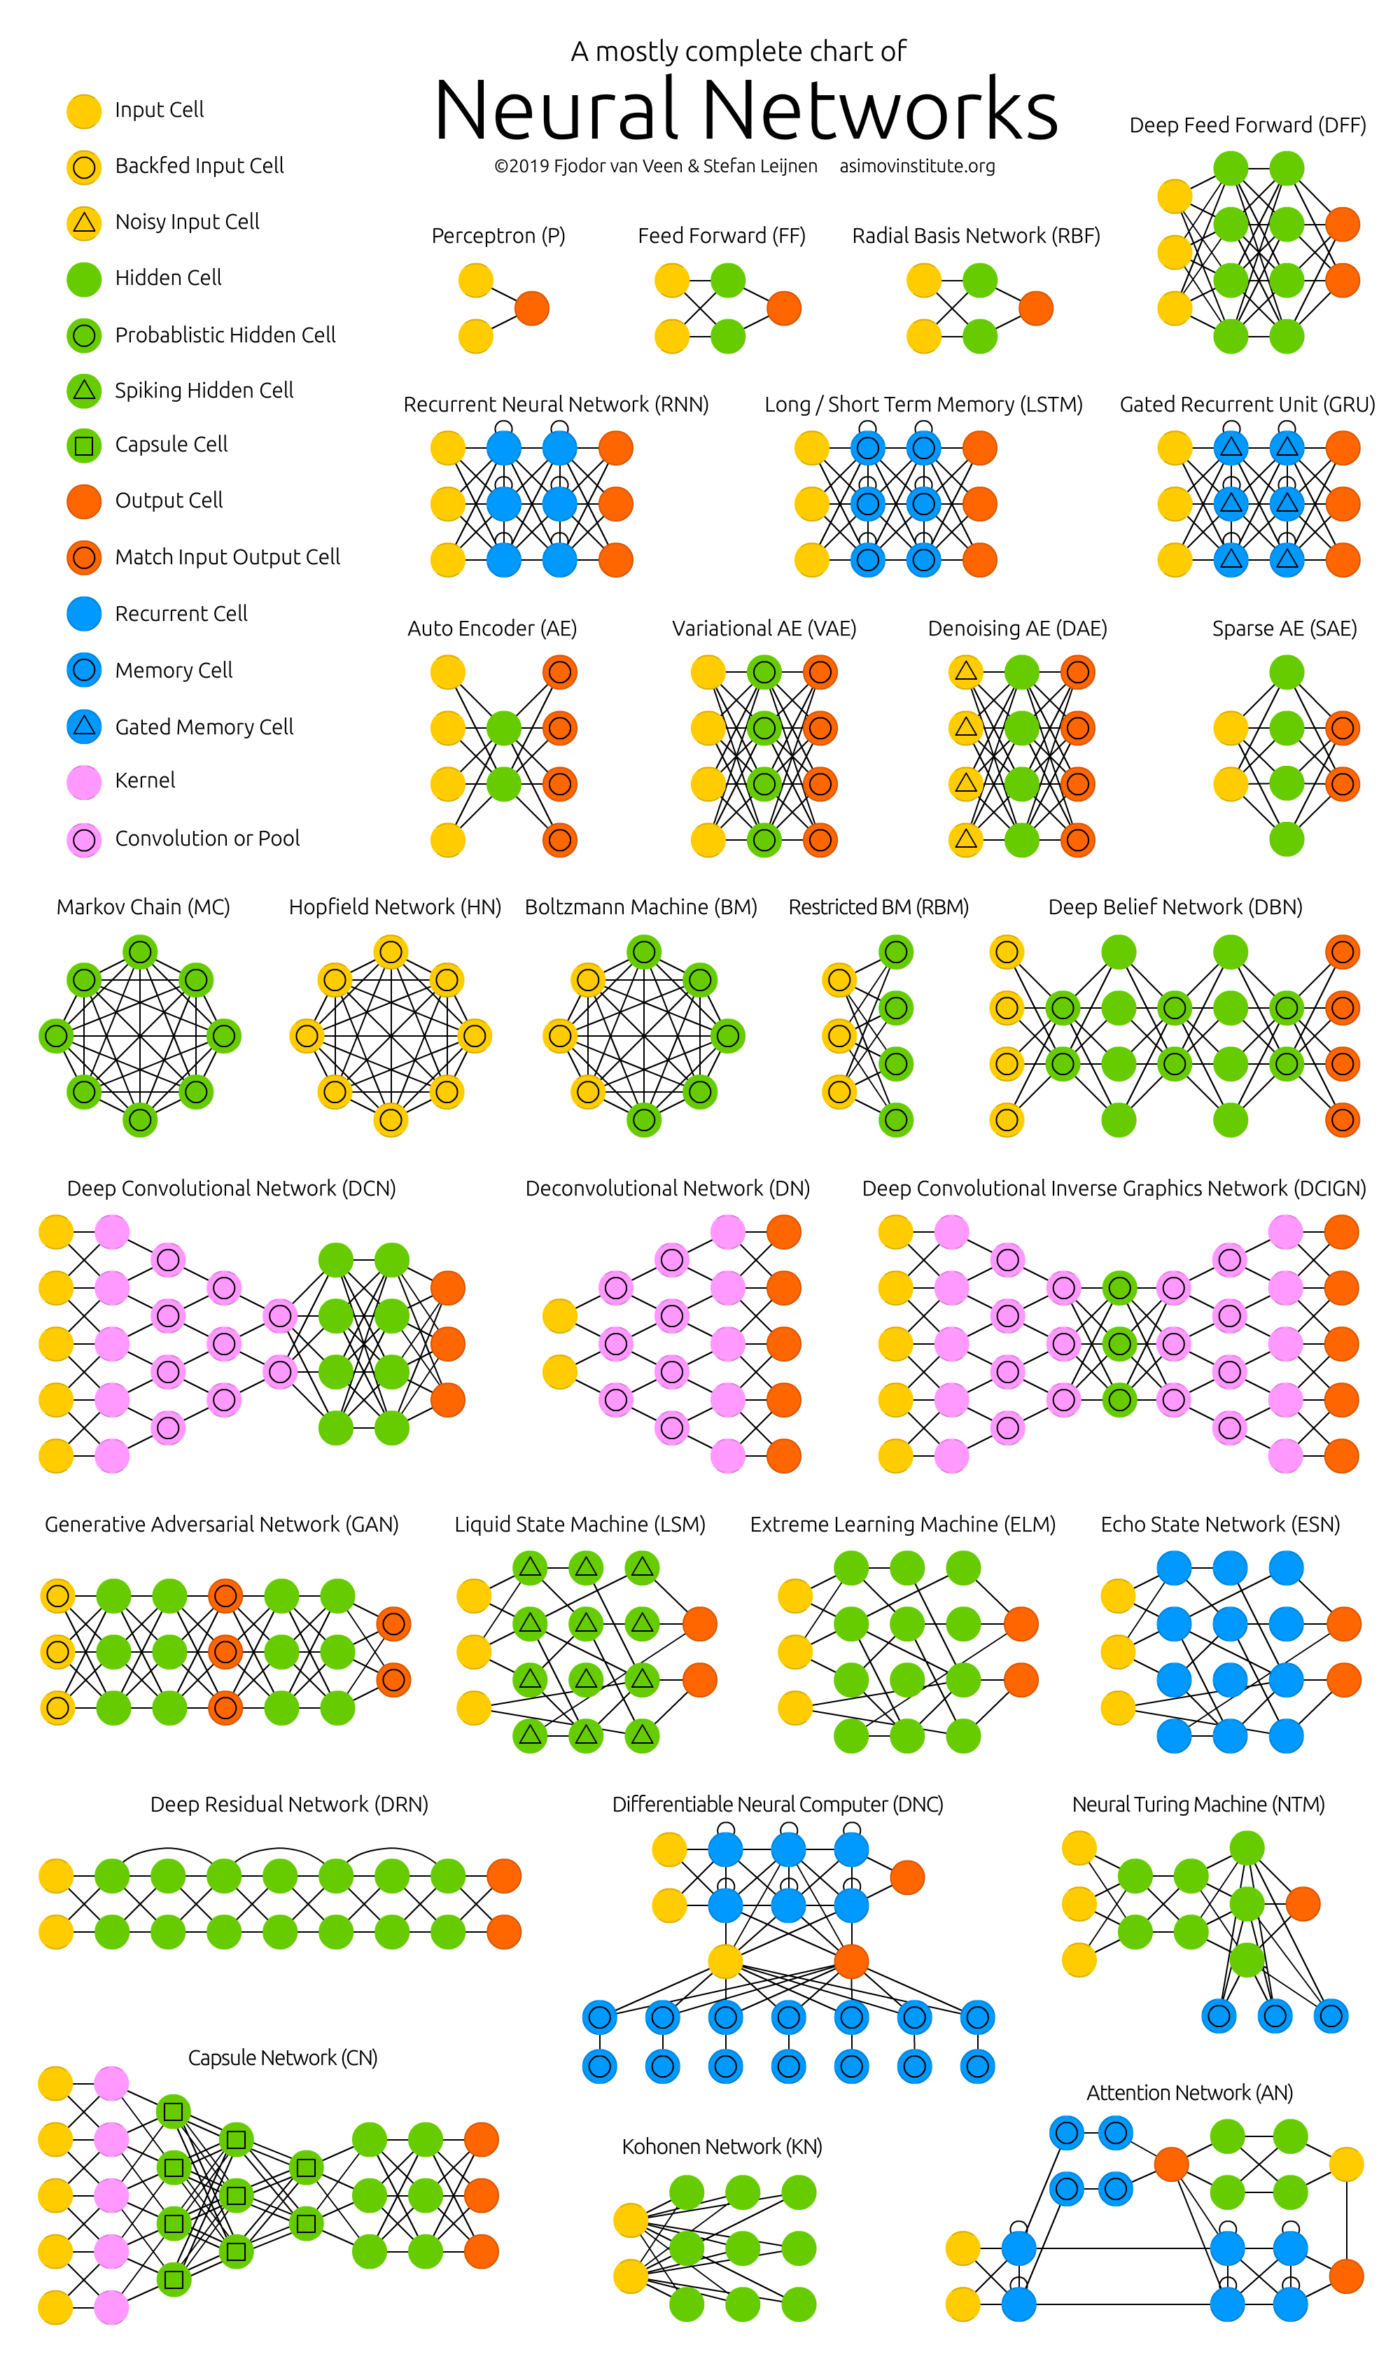

## 모델 정의
### `nn.Module` 상속 클래스 정의
- `nn.Module`을 상속받는 클래스 정의
- `__init__()`: 모델에서 사용될 모듈과 활성화 함수 등을 정의
- `forward()`: 모델에서 실행되어야 하는 연산을 정의

In [104]:
class Model(nn.Module):
  def __init__(self, inputs):
    super(Model, self).__init__()
    self.layer = nn.Linear(inputs, 1)
    self.activation = nn.Sigmoid()

  def forward(self, x):
    x = self.layer(x)
    x = self.activation(x)

    return x

In [105]:
model = Model(1)
print(list(model.children()))
print(list(model.modules()))



[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


### `nn.Sequential`을 이용한 신경망 정의
- `nn.Sequential` 객체로 그 안에 각 모듈을 순차적으로 실행
- `__init__()`에서 사용할 네트워크 모델들을 `nn.Sequential`로 정의 가능
- `forward()`에서 실행되어야 할 계산을 가독성 높게 작성 가능

In [106]:
class Model(nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer3 = nn.Sequential(
        nn.Linear(in_features=30*5*5, out_features=10, bias=True),
        nn.ReLU(inplace=True),
    )

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = x.view(x.shape[0], -1)

    return x

In [107]:
model = Model()
print(list(model.children()))
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
  (

### 파이토치 사전학습 모델

* https://pytorch.org/vision/stable/models.html

## 모델 파라미터

### 손실 함수
- 예측 값과 실제 값 사이의 오차를 측정한다.
- 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표이다.
- 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표이다.
- 손실 함수에 따른 결과를 통해 학습 파라미터를 조정한다.
- 최적화 이론에서 최소화하고자 하는 함수
- 미분 가능한 함수 사용
- 파이토치의 주요 손실 함수
  - `torch.nn.BCELoss`: 이진 분류를 위해 사용
  - `torch.nn.CrossEntropyLoss`: 다중 클래스 분류를 위해 사용
  - `torch.nn.MSELoss`: 회귀 모델에서 사용

In [108]:
criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()

## 옵티마이저
- 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정한다. (특정 종류의 확률적 경사 하강법 구현)
- optimizer는 step()을 통해 전달받은 파라미터를 모델 업데이트한다.
- 모든 옵티마이저를 기본으로 torch.optim.Optimizer(params, defaults) 클래스 사용
- zero_grad()를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
- torch.optim.lr_scheduler를 이용해 에포크(epochs)에 따라 학습률(learning rate) 조절
- 파이토치의 주요 옵티마이저 : optim.Adadelta, optim.Adagrad, optim.Adam, optim.SGD

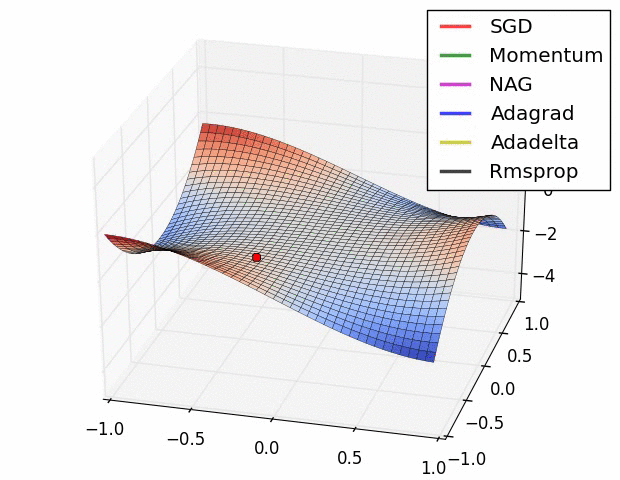

### 학습률 스케줄러(Learning rate scheduler)

* 학습시 특정 조건에 따라 학습률을 조정하여 최적화 진행
* 일정 횟수 이상이 되면 학습률을 감소(decay)시키거나 전역 최소점(global minimum) 근처에 가면 학습률을 줄이는 등
* 파이토치의 학습률 스케줄러 종류
  - `optim.lr_scheduler.LambdaLR`: 람다(lambda) 함수를 이용해 그 결과를 학습률로 설정
  - `optim.lr_scheduler.StepLR`: 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소
  - `optim.lr_scheduler.MultiStepLR`: `StepLR`과 비슷하지만 특정 단계가 아니라 지정된 에포크에만 감마 비율로 감소
  - `optim.lr_scheduler.ExponentialLR`: 에포크마다 이전 학습률에 감마만큼 곱함
  - `optim.lr_scheduler.CosineAnnealingLR`: 학습률을 코사인(cosine) 함수의 형태처럼 변화시켜 학습률일 커지기도 하고 작아지기도 함
  - `optim.lr_scheduler.ReduceLROnPlateau`: 학습이 잘되는지 아닌지에 따라 동적으로 학습률 변화

### 지표 (Metrics)
- 모델의 학습과 테스트 단계를 모니터링

In [109]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 699.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [111]:
import torchmetrics

preds = torch.randn(10, 5).softmax(dim=-1)
target = torch.randint(5, (10, ))

print(preds, target)




tensor([[0.2973, 0.0644, 0.2748, 0.0627, 0.3008],
        [0.0847, 0.0777, 0.0409, 0.7630, 0.0338],
        [0.1353, 0.0599, 0.1584, 0.0532, 0.5933],
        [0.1564, 0.4112, 0.0986, 0.2487, 0.0851],
        [0.1707, 0.0529, 0.0765, 0.4220, 0.2779],
        [0.2716, 0.3550, 0.0738, 0.1894, 0.1103],
        [0.1459, 0.0742, 0.4818, 0.2150, 0.0831],
        [0.3652, 0.0759, 0.0836, 0.0518, 0.4235],
        [0.0484, 0.3214, 0.2384, 0.0776, 0.3141],
        [0.0487, 0.5367, 0.0503, 0.2700, 0.0943]]) tensor([1, 2, 1, 1, 0, 2, 3, 3, 2, 2])


In [113]:
metrics = torchmetrics.Accuracy(task="multiclass", num_classes=5)

n_batches = 10

for i in range(n_batches):

  preds = torch.randn(10, 5).softmax(dim=-1)
  target = torch.randint(5, (10, ))

  acc = metrics(preds, target)
  print(acc)

tensor(0.3000)
tensor(0.1000)
tensor(0.4000)
tensor(0.4000)
tensor(0.1000)
tensor(0.4000)
tensor(0.)
tensor(0.)
tensor(0.2000)
tensor(0.2000)


## 선형 획귀 모델 (Linear Regression Model)
### 데이터 생성

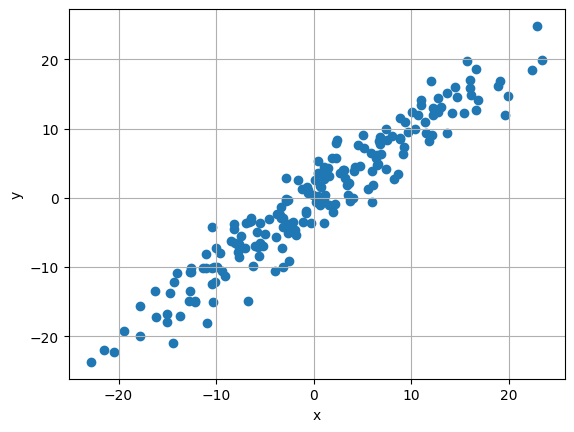

In [114]:
x = torch.randn(200, 1) * 10
y = x + 3 * torch.randn(200, 1)

plt.scatter(x.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')

plt.grid()
plt.show()

### 모델 정의 및 파라미터

In [115]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1, 1)

    def forward(self, x):
      pred = self.linear(x)
      return pred

In [116]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.8844]], requires_grad=True), Parameter containing:
tensor([0.5898], requires_grad=True)]


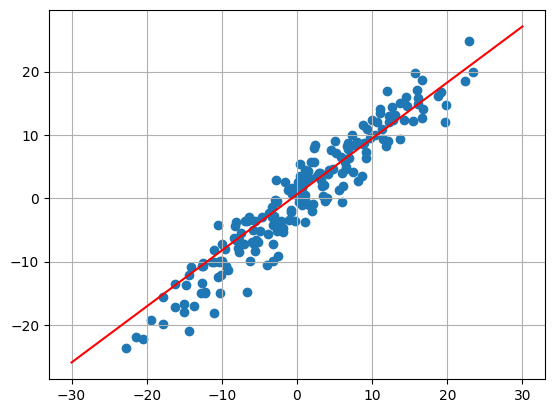

In [118]:
w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item()

x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(x, y)
plt.grid()
plt.show()